# Drawing basic shapes in OpenCV
- Drawing Line
- Drawing Rectangle
- Drawing Circle
- Drawing Ellipse
- Drawing Polygon
- Adding Text to Images


## Drawing line

Syntax: cv2.line(image, pt1, pt2, color, thickness, lineType, shift)

Parameters:
- image (required): It is the image on which line is to be drawn.
- pt1 (required): It is the starting point of line given as a tuple (x, y).
- pt2 (required): It is the ending point of line given as tuple (x, y).
- color (required): It is the color of line to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color. 
- thickness (optional): It is the thickness of the line in px. Thickness of -1 px will fill the rectangle shape by the specified color.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Turn off left xticks
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
# Turn off bottom yticks
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.labelleft'] = True
# Turn on top xticks
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.labeltop'] = True
# Set figure edge color
plt.rcParams['figure.edgecolor'] = 'red'
# Set x and y axis text labels size
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15


def show(img: np.ndarray,grid: bool = False,figsize: tuple = (10,10),dpi: int = 100) -> None:
    # Get image shape
    width,height = img.shape[:2]
    # Define figure
    fig,ax = plt.subplots(figsize=figsize,dpi=dpi)
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, width, 100)
    minor_ticks = np.arange(0, width, 10)
    # Set major ticks for x and y axis
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    # Set minor ticks for x and y axis
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)

    # Set grid
    if grid:
        # ax.grid(which='both')
        # Turn on the grid for the minor ticks (only, otherwise there will be two grids)
        ax.grid(which='minor', alpha=0.1)
        # Turn on the grid for the major ticks (only, otherwise there will be two grids)
        ax.grid(which='major', alpha=0.3)


    plt.imshow(img)
    # Save figure with transparent background
    plt.savefig('test.png', transparent=True,dpi=200)

    plt.show()
    

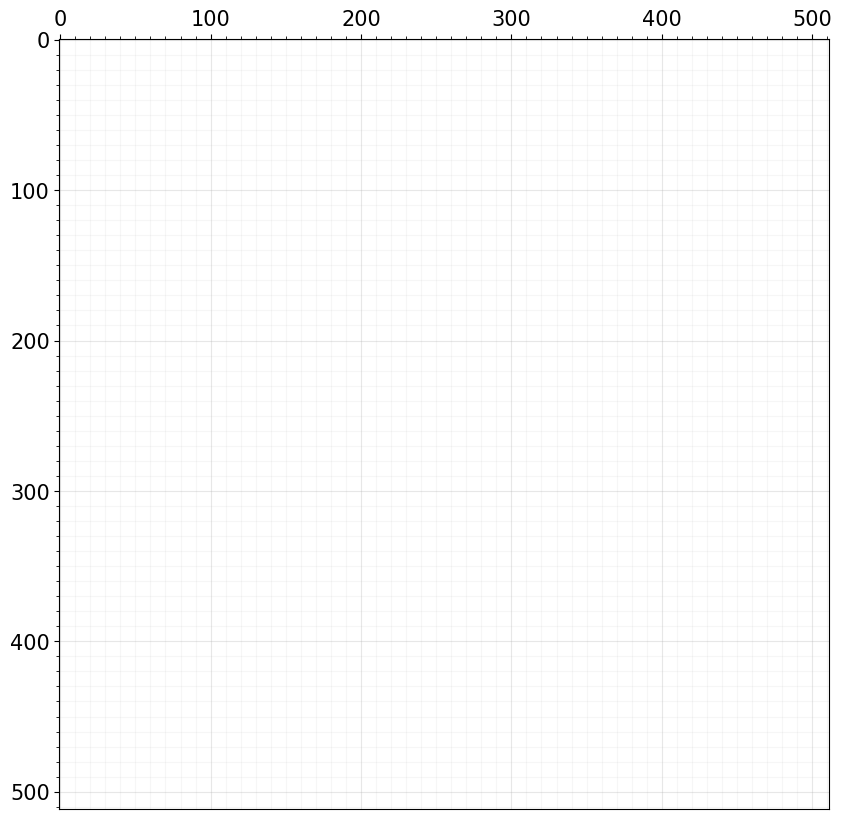

In [2]:
# Create white image with numpy
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Create a white image with numpy 
image = np.full((512, 512, 3), 255, np.uint8)
# Draw a diagonal blue line
color = '#4287f5' # (R, G, B) = (66, 135, 245)

# Convert color to RGB
color = tuple(int(color[i:i+2], 16) for i in (1, 3, 5))
# cv2.line(image, (100, 100), (400, 300), color, 2)

show(image,grid=True)


## Put text on image

syntax: cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

| Parameter | Condition | Type | Description |
| --- | --- | --- | --- |
| img | Required | Array | The image where you want to put the text on. |
| text | Required | String | The text string to be drawn. |
| org | Required | Tuple | The bottom-left corner of the text string in the image. |
| fontFace | Required | Integer | Font type. |
| fontScale | Required | Float | Font scale factor that is multiplied by the font-specific base size. |
| color | Required | Tuple | Text color. |
| thickness | Optional | Integer | Thickness of the lines used to draw a text. |


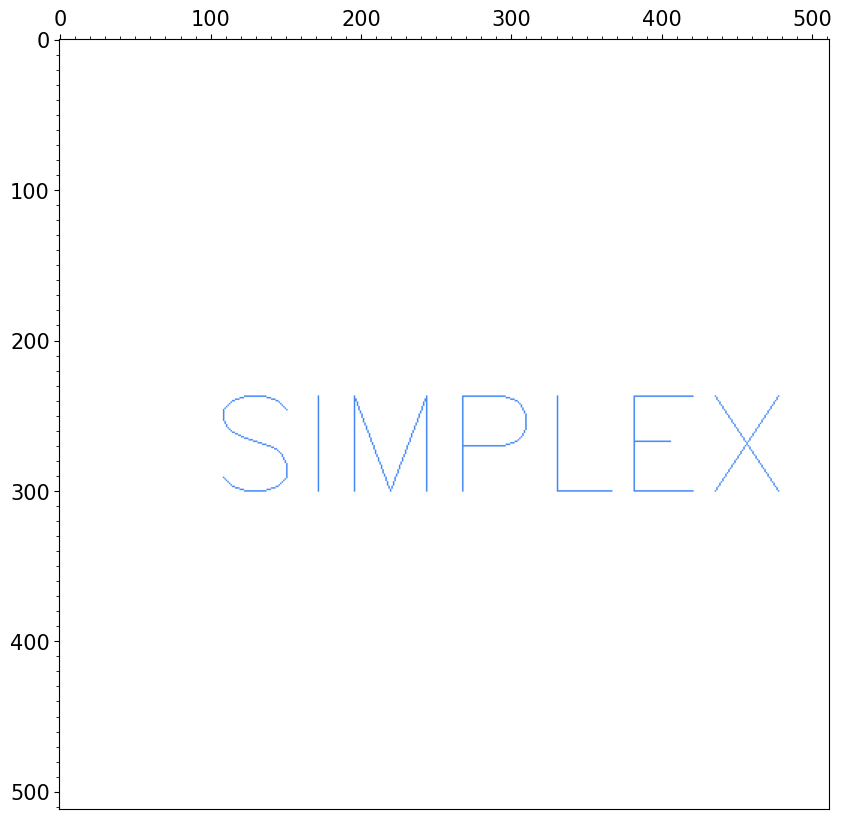

In [3]:
# Create white image
img = np.full((512,512,3), 255, np.uint8)
# Text
font = cv2.FONT_HERSHEY_SIMPLEX
color = (66, 135, 245)
cv2.putText(img,'SIMPLEX',org=(100,300), fontFace=font,fontScale=3,color=color)
show(img)

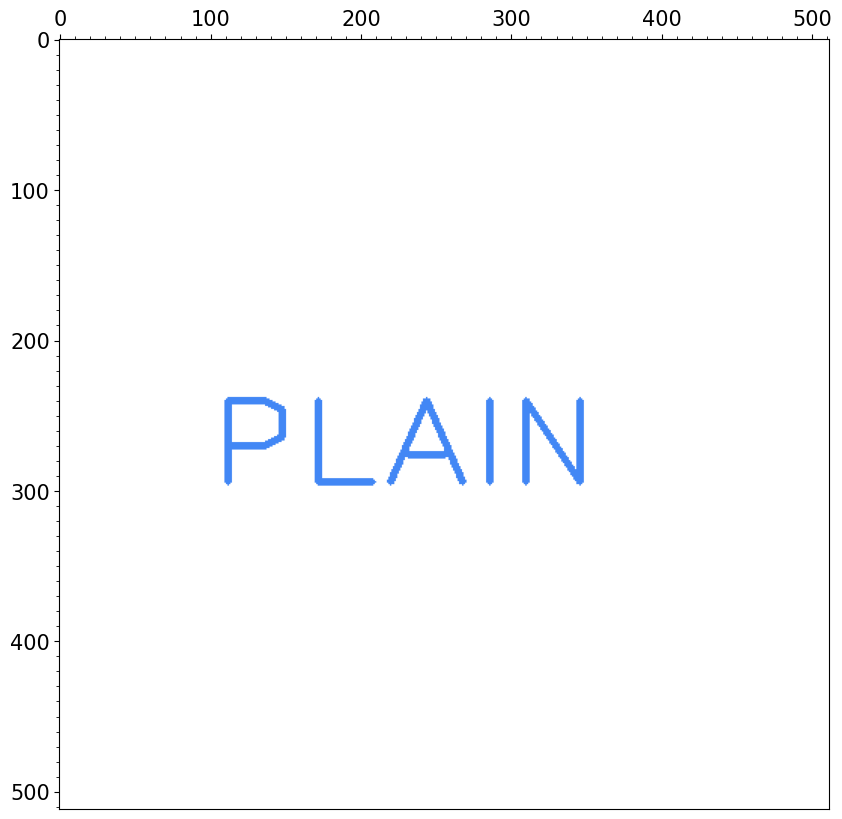

In [4]:
# Create white image
img = np.full((512,512,3), 255, np.uint8)
# Text
font = cv2.FONT_HERSHEY_PLAIN
color = (66, 135, 245)
cv2.putText(img,'PLAIN',org=(100,300), fontFace=font,fontScale=6,color=color,thickness=4)
show(img)

## Drawing polygon

syntax: cv2.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]])
| Parameter | type | condition | description |
| --- | --- | --- | --- |
| img | numpy.ndarray | required | The image to draw on |
| pts | numpy.ndarray | required | Array of polygonal curves |
| isClosed | bool | required | Flag indicating whether the drawn polylines are closed or not. If they are closed, the function draws a line from the last vertex of each curve to its first vertex |
| color | tuple | required | Color of the polyline segments |
| thickness | int | optional | Thickness of the polyline segments |
| lineType | int | optional | Type of the line segments |   

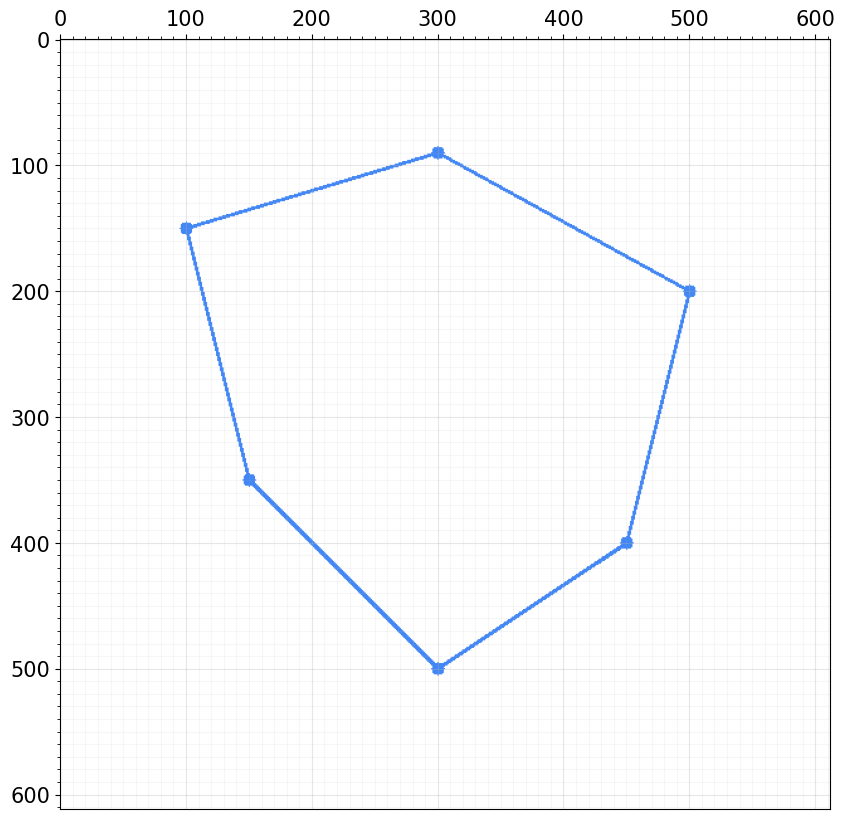

In [5]:
# Create a white image
img = np.full((612, 612, 3), 255, np.uint8)

# Coordinates of the polygon
pts = np.array([
    [150,350],
    [100,150],
    [300,90],
    [500,200],
    [450,400],
    [300,500]
    ], np.int32)
color = (66, 135, 245)
# Draw a circle 
for i in pts:
    img = cv2.circle(img, tuple(i), 5, color, -1)
img = cv2.polylines(img, [pts], True, color, 2)

show(img,grid=True)

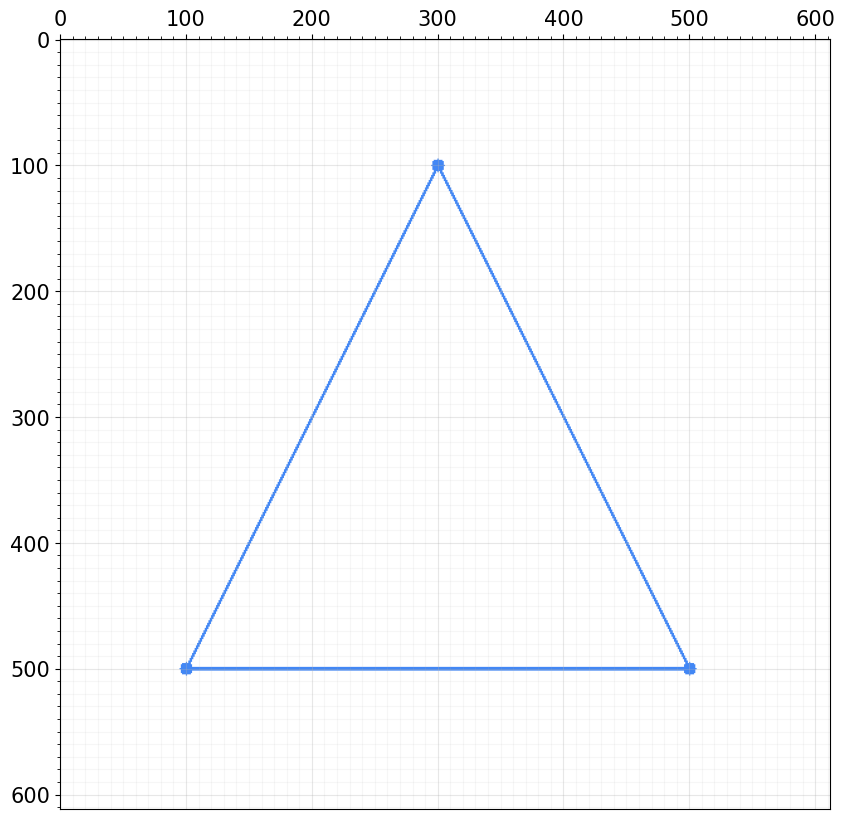

In [6]:
# Drawing a single open polyline
# Create a white image
img = np.full((612, 612, 3), 255, np.uint8)

# Coordinates of the polygon
pts = np.array([
    [100,500],
    [300,100],
    [500,500]
    ], np.int32)
color = (66, 135, 245)
# Draw a circle 
for i in pts:
    img = cv2.circle(img, tuple(i), 5, color, -1)
img = cv2.polylines(img, [pts], isClosed=True, color=color, thickness=2)

show(img,grid=True)

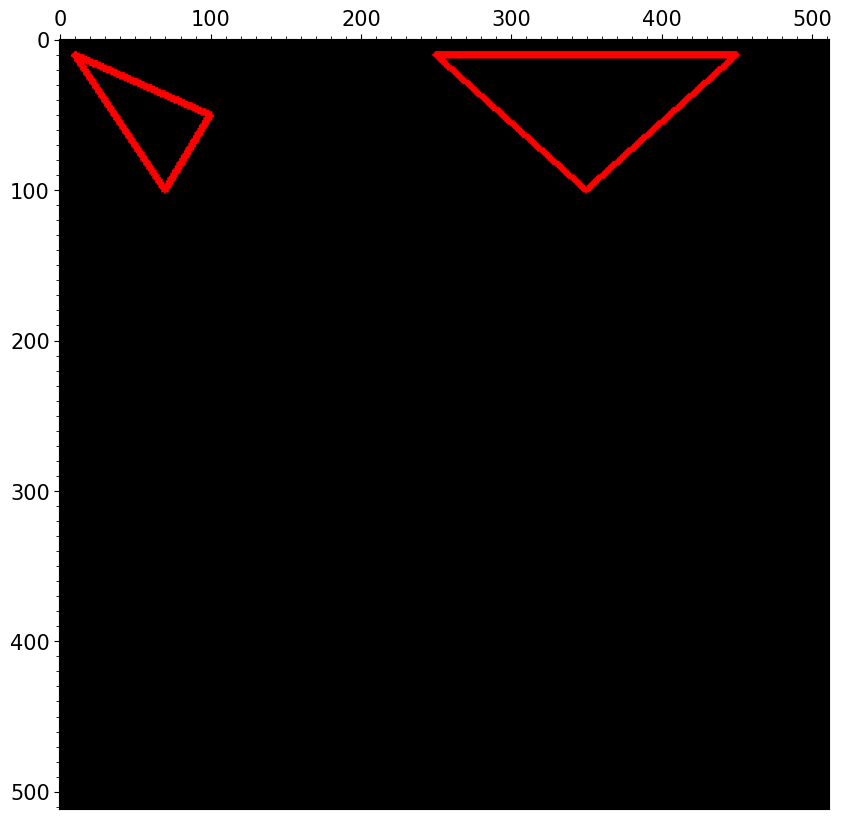

In [7]:
# Drawing multiple closed polylines:
img = np.zeros((512,512,3), np.uint8)

pts1 = np.array([[10,10],[100,50],[70,100]])
pts2 = np.array([[250,10],[350,100],[450,10]]) 

cv2.polylines(img, [pts1, pts2], True, (255,0,0), 3)
show(img)

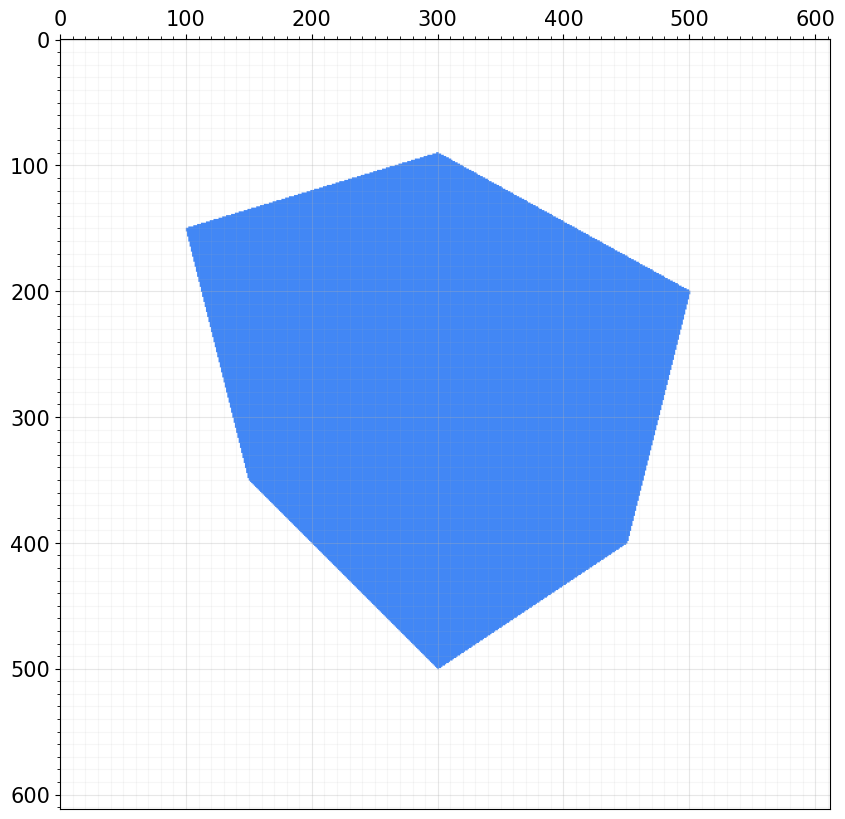

In [9]:
# Create a white image
img = np.full((612, 612, 3), 255, np.uint8)

# Coordinates of the polygon
pts = np.array([
    [150,350],
    [100,150],
    [300,90],
    [500,200],
    [450,400],
    [300,500]
    ], np.int32)
color = (66, 135, 245)
# Draw a circle 
# for i in pts:
#     img = cv2.circle(img, tuple(i), 5, color, -1)
img = cv2.fillPoly(img, [pts], color)

show(img,grid=True)